In [1]:
import os

import act
import matplotlib.pyplot as plt

# First import the NetCDF4 package
from netCDF4 import Dataset
from netCDF4 import MFDataset

# Next import plotting functions
from pylab import *

from datetime import date, datetime

In [2]:
# Place your username and token here
my_arm_username = 'LourencoCavalcante' 
api_access_token = '311d84bc76093a97' #https://adc.arm.gov/armlive/register


In [3]:
#Site: 
datastream = 'cormwrpM1.b1'
date_start = '2018-09-23' 
date_end = '2019-04-09'


In [ ]:
# Download MWR data on ARM
act.discovery.download_data(my_arm_username, api_access_token, datastream, date_start, date_end)

In [ ]:
#Create directores for output plot figures
dir = (f'./{datastream}/output/figures')  
os.makedirs(dir)
#os.mkdir(dir)

<Axes: title={'center': 'mwr_mp3000a infraredTemperature on 20190301'}, xlabel='Time [UTC]', ylabel='(K)'>

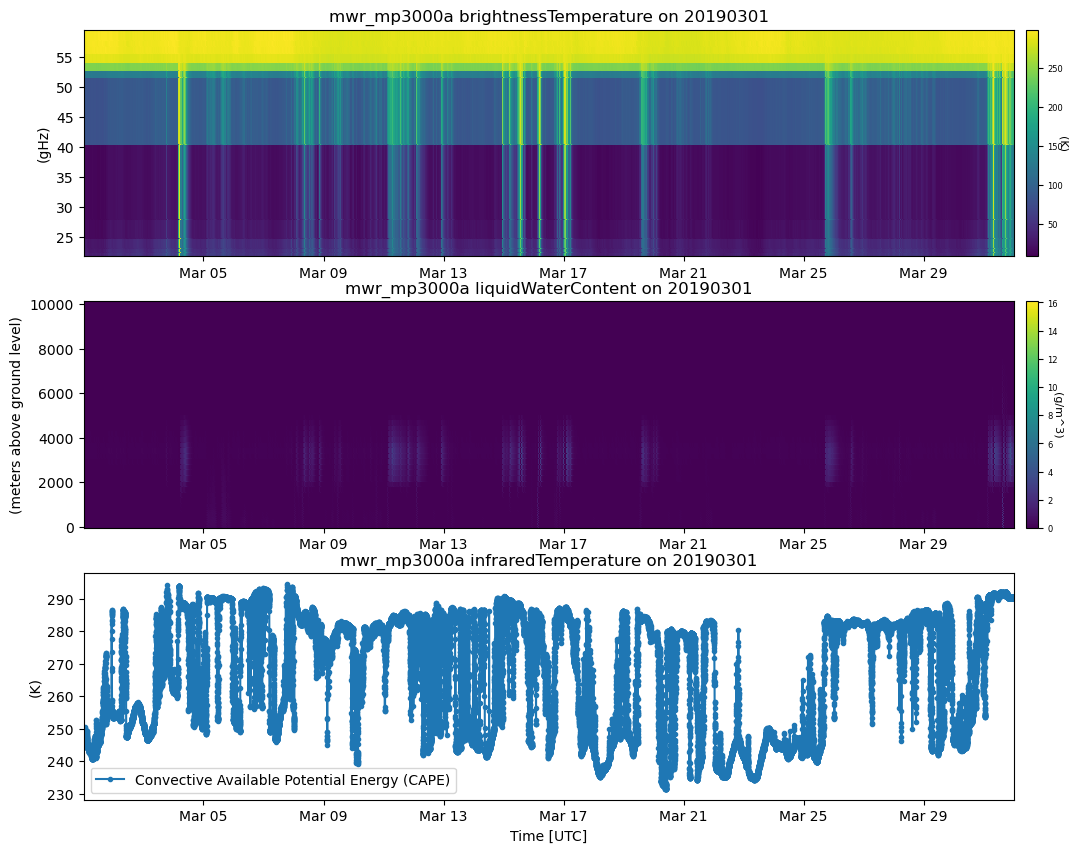

In [25]:
data = datetime.today()
hoje = data.strftime('%d-%m-%Y')
hora = data.strftime('%H-%M-%S')

keepdims=False

#Access directores files downloaded

mwr_mp3000a_ds = act.io.armfiles.read_netcdf(f'./{datastream}/{datastream}.201903*.cdf')
ceil_ds = act.io.armfiles.read_netcdf(f'./{datastream}/{datastream}.201903*.cdf')



#print(mwr_mp3000a_ds.variables)
# Create a TimeSeriesDisplay object
#mwr_mp3000a_ds = mwr_mp3000a_ds.resample(time='1min').nearest()
#ceil_ds = ceil_ds.resample(time='1min').nearest()

display = act.plotting.TimeSeriesDisplay(
   {'mwr_mp3000a': mwr_mp3000a_ds, 'mwr_mp3000a_': ceil_ds},
   subplot_shape=(3,), figsize=(12,10)
)

# Plot data

display.plot('brightnessTemperature', dsname='mwr_mp3000a' , set_shading='nearest',
   subplot_index=(0,))


display.plot('liquidWaterContent', dsname='mwr_mp3000a', set_shading='nearest',
   subplot_index=(1,))

display.plot('infraredTemperature', dsname='mwr_mp3000a', set_shading='nearest', label='Convective Available Potential Energy (CAPE)',
   subplot_index=(2,))


#plt.savefig(f'{datastream}/output/figures/{datastream}_{hoje}_{hora}.png')



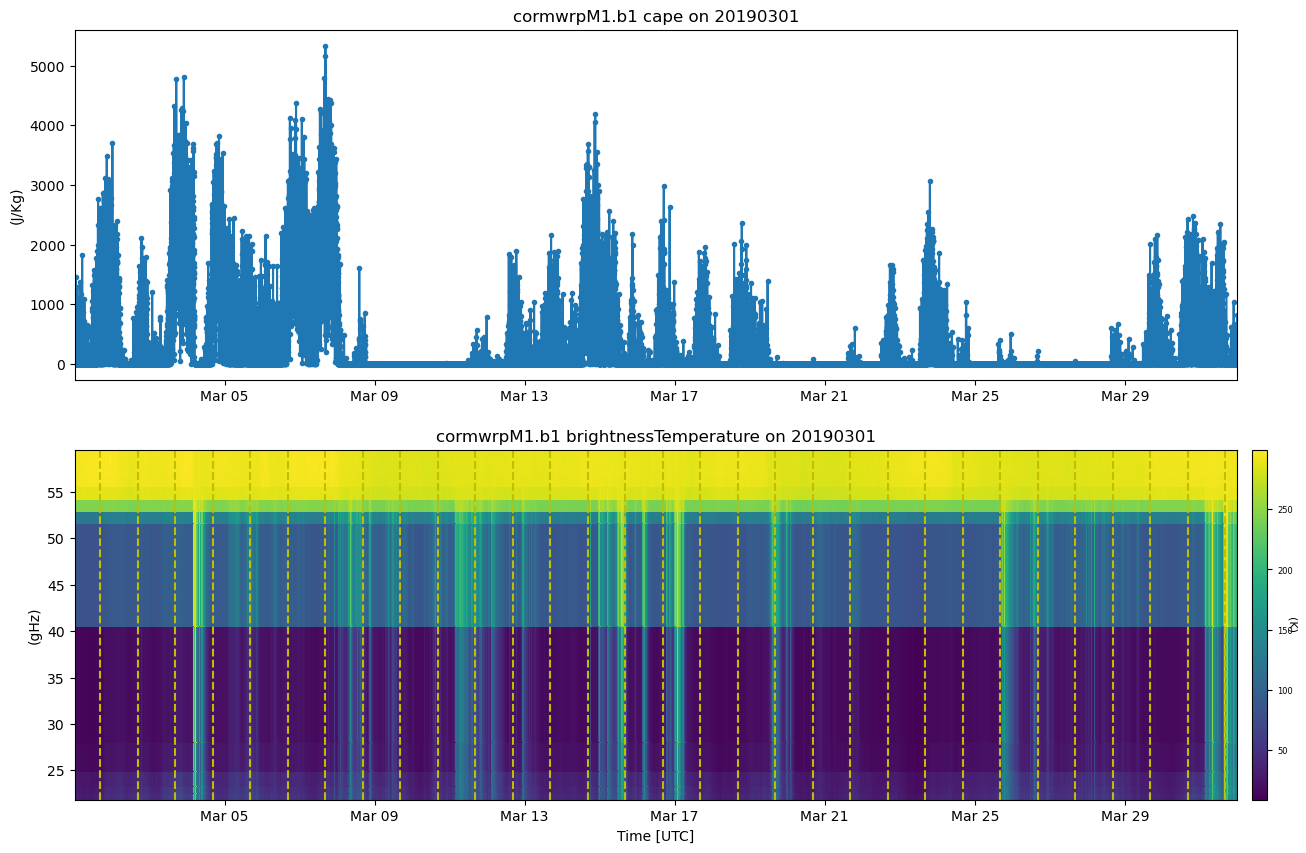

In [27]:
# You can use tuples if the datasets in the tuple contain a
# datastream attribute. This is required in all ARM datasets.
display = act.plotting.TimeSeriesDisplay((mwr_mp3000a_ds, ceil_ds), subplot_shape=(2,), figsize=(15, 10))
display.plot('cape', 'cormwrpM1.b1', subplot_index=(0,))
display.plot('brightnessTemperature', 'cormwrpM1.b1', subplot_index=(1,))
display.day_night_background('cormwrpM1.b1', subplot_index=(1,))
plt.show()

EXIBINDO AS VARIÁVEIS:

In [44]:
#print(mwr_mp3000a_ds.variables.keys())
print(mwr_mp3000a_ds)

<xarray.Dataset>
Dimensions:                          (time: 44307, frequency: 12, height: 47)
Coordinates:
  * time                             (time) datetime64[ns] 2019-03-01T00:09:1...
  * frequency                        (frequency) float32 22.24 23.03 ... 58.8
  * height                           (height) float32 0.0 100.0 ... 1e+04
Data variables: (12/71)
    base_time                        (time) datetime64[ns] 2019-03-01 ... 201...
    time_offset                      (time) datetime64[ns] 2019-03-01T00:09:1...
    qc_time                          (time) int32 dask.array<chunksize=(1430,), meta=np.ndarray>
    azimuth                          (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    elevation                        (time) float32 dask.array<chunksize=(1430,), meta=np.ndarray>
    surfacePressure                  (time) float32 dask.array<chunksize=(1430,), meta=np.ndarray>
    ...                               ...
    qc_blackbodyTemperature          (time) int32 dask.a

REFERENCES:

@misc{zhang, title={MWR Retrievals (MWRRET1LILJCLOU)}, DOI={10.5439/1027369}, journal={Atmospheric Radiation Measurement (ARM) user facility}, author={Zhang, Damao} }